# 06-post-analysis

How can we verify if the trained models are correct in their predictions? 

One way is to verify against known candidates. 

In [1]:
import sys
sys.path.insert(0, "../")

import pandas as pd
from pathlib import Path
from src.visualization import visualize

data_dir = Path.cwd().parent.parent.parent / "data"
models_dir = Path.cwd().parent.parent.parent / "models" 

print("Current data directory {}".format(data_dir))

# Optional: Load the "autoreload" extension so that code can change
%load_ext autoreload

#OPTIONAL: Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

Current data directory /home/oliver/Dokumenter/masterprosjekt/predicting-solid-state-qubit-candidates/data


In [2]:
known_candidates = ["SiC","SiGe", "C", "Si",
                         "GaN", "GaAs", "AlN", "ZnS", "ZnSe", "ZnO",
                         "AlP", "GaP", "AlAs", "ZnTe", "CdS"
                    ]
QD_2D_candidates = ["BN", "MoS2", "WSe2", "WS2",#2D
                    "InAs" #QD
                   ] 

In [3]:
title = "Insightful summary"
InsertApproach = "03-insightful-approach"
numberOfPrincipalComponents = 3

## Training set

In [4]:
trainingSet   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingData.pkl")
trainingTarget   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingTarget.pkl")
trainingSet["candidate"] = trainingTarget

In [5]:
trainingSet

material_id  full_formula  AtomicOrbitals|HOMO_character  \
0         mp-24            C8                            2.0   
1         mp-47            C4                            2.0   
2         mp-66            C2                            2.0   
3        mp-149           Si2                            2.0   
4        mp-165           Si4                            2.0   
..          ...           ...                            ...   
584  mp-1275839  Co4Bi24S8O64                            3.0   
585  mp-1291058  Sr4Mn2Mo2O12                            3.0   
586  mp-1291630       Fe12O16                            3.0   
587  mp-1298346     Sr8Co4O16                            3.0   
588  mp-1539137      Rb1Cr5S8                            3.0   

     AtomicOrbitals|HOMO_element  AtomicOrbitals|HOMO_energy  \
0                              6                   -0.199186   
1                              6                   -0.199186   
2                              6                   -0.199186   
3                             14                   -0.153293   
4                             14                   -0.153293   
..                           ...                         ...   
584                           27                   -0.322368   
585                           25                   -0.266540   
586                           26                   -0.295049   
587                           27                   -0.322368   
588                           24                   -0.118123   

     AtomicOrbitals|LUMO_character  AtomicOrbitals|LUMO_element  \
0                              2.0                            6   
1                              2.0                            6   
2                              2.0                            6   
3                              2.0                           14   
4                              2.0                           14   
..                             ...                          ...   
584                            3.0                           27   
585                            3.0                           25   
586                            3.0                           26   
587                            3.0                           27   
588                            3.0                           24   

     AtomicOrbitals|LUMO_energy  \
0                     -0.199186   
1                     -0.199186   
2                     -0.199186   
3                     -0.153293   
4                     -0.153293   
..                          ...   
584                   -0.322368   
585                   -0.266540   
586                   -0.295049   
587                   -0.322368   
588                   -0.118123   

     AtomicPackingEfficiency|dist from 1 clusters |APE| < 0.010  \
0                                             1.000000            
1                                             1.000000            
2                                             1.000000            
3                                             1.000000            
4                                             1.000000            
..                                                 ...            
584                                           0.034641            
585                                           0.052116            
586                                           0.091832            
587                                           0.057864            
588                                           0.033111            

     AtomicPackingEfficiency|dist from 3 clusters |APE| < 0.010  ...  \
0                                             1.000000           ...   
1                                             1.000000           ...   
2                                             1.000000           ...   
3                                             1.000000           ...   
4                                             1.000000           ...   
.. 

In [6]:
#trainingSet[["full_formula", "pretty_formula", "candidate"]][trainingSet["pretty_formula"].isin(known_candidates)]

## Test set
How many entries in our test set consists of known candidates?

In [7]:
Summary = pd.read_pickle(models_dir / InsertApproach /  "summary" / Path("PCA-" + str(numberOfPrincipalComponents) + "-" + "summary.pkl"))
Summary = Summary.reset_index(drop=True)
Summary.shape

generatedData = pd.read_pickle(data_dir / "interim" / "featurized" / "featurized-10-05-2021.pkl")
generatedData = generatedData[~generatedData["material_id"].isin(trainingSet["material_id"])].reset_index(drop=True)
Summary["MP BG"] = generatedData["MP_Eg"]

In [8]:
for known_candidate in known_candidates:
    with pd.option_context('display.max_rows', 100, 'display.max_columns', 12):
        print(known_candidate)
        display(Summary[Summary["pretty_formula"]==known_candidate])

SiC


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

SiGe


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

C


material_id full_formula pretty_formula  LOG   LOG Prob  DT   DT Prob  \
15373   mp-630227          C60              C   0.0  0.119760  0.0      0.0   
16130   mp-667273          C60              C   1.0  0.536838  1.0      1.0   
16381   mp-680372          C60              C   0.0  0.102531  0.0      0.0   
16456   mp-683919         C140              C   0.0  0.092185  0.0      0.0   
21285  mp-1194362          C28              C   0.0  0.032420  0.0      0.0   
22076  mp-1196583         C240              C   0.0  0.149441  0.0      0.0   
24043  mp-1203645          C48              C   0.0  0.010871  0.0      0.0   
24489  mp-1205417          C20              C   0.0  0.070902  0.0      0.0   

       RF   RF Prob  GB    GB Prob   MP BG  
15373  1.0     0.64  0.0  0.000413  0.9100  
16130  1.0     0.88  1.0  0.999968  1.2370  
16381  1.0     0.64  0.0  0.000413  0.7132  
16456  1.0     0.66  0.0  0.000413  1.1035  
21285  0.0     0.28  0.0  0.000014  2.0672  
22076  1.0     0.71  0.0  0.000413  1.3517  
24043  1.0     0.59  0.0  0.000413  1.8637  
24489  0.0     0.01  0.0  0.000014  4.1975

Si


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

GaN


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

GaAs


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

AlN


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

ZnS


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

ZnSe


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

ZnO


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

AlP


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

GaP


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

AlAs


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

ZnTe


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

CdS


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

In [9]:
Summary[Summary["pretty_formula"].isin(QD_2D_candidates)]

material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
45         mp-344         B4N4             BN   1.0  0.769568  1.0  0.812500   
239       mp-1599         B4N4             BN   0.0  0.065238  0.0  0.000000   
242       mp-1639         B1N1             BN   1.0  0.994951  1.0  1.000000   
386       mp-2653         B2N2             BN   1.0  0.993113  1.0  1.000000   
3088     mp-13151         B4N4             BN   1.0  0.964524  1.0  0.529412   
5148     mp-20305       In1As1           InAs   1.0  0.991265  1.0  1.000000   
15769   mp-644751         B4N4             BN   1.0  0.920424  1.0  0.812500   
19208  mp-1077506         B3N3             BN   1.0  0.806507  1.0  0.812500   

       RF    RF Prob  GB    GB Prob   MP BG  
45     1.0  0.882403  1.0  0.999963  3.5021  
239    1.0  0.660000  0.0  0.000413  1.6009  
242    1.0  0.999756  1.0  0.999971  4.6482  
386    1.0  0.999756  1.0  0.999971  5.3630  
3088   1.0  0.875238  1.0  0.999954  4.8257  
5148   1.0  0.935113  1.0  0.999971  0.3050  
15769  1.0  0.721661  1.0  0.999968  5.6697  
19208  1.0  0.639756  0.0  0.000178  1.0837

In [10]:
atleast_one_model = Summary[(Summary["RF "] == 1) | 
                       (Summary["DT "] == 1) |
                       (Summary["GB "] == 1) | 
                       (Summary["LOG "] == 1)]

atleast_one_model.to_csv(models_dir / InsertApproach / "summary" / "atleast_one_model.csv")
atleast_one_model

material_id  full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
1            mp-7            S6              S   1.0  0.832759  1.0  0.812500   
2           mp-14           Se3             Se   1.0  0.958519  1.0  1.000000   
3           mp-19           Te3             Te   1.0  0.959562  1.0  1.000000   
4           mp-25            N8             N2   1.0  0.893364  1.0  0.812500   
8          mp-111           Ne1             Ne   1.0  0.960822  1.0  1.000000   
...           ...           ...            ...   ...       ...  ...       ...   
24444  mp-1205309         Li2B2            LiB   0.0  0.258763  0.0  0.230769   
24447  mp-1205321         Pt8S8            PtS   0.0  0.204221  1.0  0.812500   
24450  mp-1205326     Tb7Pt1I12       Tb7PtI12   0.0  0.013613  0.0  0.230769   
24465  mp-1205354       Sc8Se12         Sc2Se3   0.0  0.277377  1.0  0.812500   
24531  mp-1238445  Be8H64N16F32     BeH8(NF2)2   0.0  0.001771  0.0  0.000000   

       RF    RF Prob  GB    GB Prob    MP BG  
1      1.0  0.684229  1.0  0.999968   2.4881  
2      1.0  0.899191  1.0  0.999971   1.0119  
3      1.0  0.872486  1.0  0.999971   0.5752  
4      0.0  0.307296  0.0  0.000021   7.4564  
8      1.0  0.857321  1.0  0.999971  11.8025  
...    ...       ...  ...       ...      ...  
24444  0.0  0.190672  1.0  0.999811   0.3803  
24447  0.0  0.149270  0.0  0.000012   0.1941  
24450  0.0  0.330199  1.0  0.999866   0.1021  
24465  0.0  0.162213  0.0  0.000009   0.6558  
24531  1.0  0.540000  0.0  0.000413   6.5561  

[1791 rows x 12 columns]

In [11]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10000):
    display(generatedData[["material_id", "MP_Eg", "MP|Polar SG"]][generatedData["pretty_formula"]=="RuC"])

material_id   MP_Eg  MP|Polar SG
18753  mp-1009792  0.7149            0

## How many entries does the models agree on? 

In [12]:
RF_DT_GB_LOG = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1) & 
                       (Summary["LOG "] == 1)]

RF_DT_GB_LOG.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB_LOG.csv")
with pd.option_context('display.max_rows', 163, 'display.max_columns', 10000):

    display(RF_DT_GB_LOG[RF_DT_GB_LOG["MP BG"]>0.5])

material_id     full_formula     pretty_formula  LOG   LOG Prob  DT   \
1            mp-7               S6                  S   1.0  0.832759  1.0   
2           mp-14              Se3                 Se   1.0  0.958519  1.0   
3           mp-19              Te3                 Te   1.0  0.959562  1.0   
8          mp-111              Ne1                 Ne   1.0  0.960822  1.0   
10         mp-137             Ge12                 Ge   1.0  0.969617  1.0   
...           ...              ...                ...   ...       ...  ...   
22665  mp-1198619   V16Ag16I32O128          VAg(IO4)2   1.0  0.963156  1.0   
22939  mp-1199624  Ba16Na8Nb40O120        Ba2NaNb5O15   1.0  0.964328  1.0   
24147  mp-1204057         Si72O144               SiO2   1.0  0.987298  1.0   
24186  mp-1204230     Sr64Ga32O112           Sr4Ga2O7   1.0  0.946602  1.0   
24253  mp-1204533  Mg45Si32H58O138  Mg45Si32(H29O69)2   1.0  0.975299  1.0   

       DT Prob  RF    RF Prob  GB    GB Prob    MP BG  
1       0.8125  1.0  0.684229  1.0  0.999968   2.4881  
2       1.0000  1.0  0.899191  1.0  0.999971   1.0119  
3       1.0000  1.0  0.872486  1.0  0.999971   0.5752  
8       1.0000  1.0  0.857321  1.0  0.999971  11.8025  
10      1.0000  1.0  0.822145  1.0  0.999971   0.8732  
...        ...  ...       ...  ...       ...      ...  
22665   1.0000  1.0  0.819555  1.0  0.999971   1.3705  
22939   1.0000  1.0  0.874444  1.0  0.999971   2.5069  
24147   1.0000  1.0  0.883867  1.0  0.999971   5.6518  
24186   1.0000  1.0  0.820570  1.0  0.999971   2.9805  
24253   1.0000  1.0  0.926602  1.0  0.999971   4.3207  

[249 rows x 12 columns]

In [13]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10000):

    display(Summary[(Summary["DT Prob"] > 0.8) & 
                    (Summary["GB Prob"] > 0.8) & 
                    (Summary["LOG Prob"] > 0.8)])

material_id     full_formula     pretty_formula  LOG   LOG Prob  DT   \
1            mp-7               S6                  S   1.0  0.832759  1.0   
2           mp-14              Se3                 Se   1.0  0.958519  1.0   
3           mp-19              Te3                 Te   1.0  0.959562  1.0   
8          mp-111              Ne1                 Ne   1.0  0.960822  1.0   
10         mp-137             Ge12                 Ge   1.0  0.969617  1.0   
...           ...              ...                ...   ...       ...  ...   
22939  mp-1199624  Ba16Na8Nb40O120        Ba2NaNb5O15   1.0  0.964328  1.0   
24113  mp-1203927         Mo8N4O30           Mo4N2O15   1.0  0.969465  1.0   
24147  mp-1204057         Si72O144               SiO2   1.0  0.987298  1.0   
24186  mp-1204230     Sr64Ga32O112           Sr4Ga2O7   1.0  0.946602  1.0   
24253  mp-1204533  Mg45Si32H58O138  Mg45Si32(H29O69)2   1.0  0.975299  1.0   

       DT Prob  RF    RF Prob  GB    GB Prob    MP BG  
1       0.8125  1.0  0.684229  1.0  0.999968   2.4881  
2       1.0000  1.0  0.899191  1.0  0.999971   1.0119  
3       1.0000  1.0  0.872486  1.0  0.999971   0.5752  
8       1.0000  1.0  0.857321  1.0  0.999971  11.8025  
10      1.0000  1.0  0.822145  1.0  0.999971   0.8732  
...        ...  ...       ...  ...       ...      ...  
22939   1.0000  1.0  0.874444  1.0  0.999971   2.5069  
24113   1.0000  1.0  0.903409  1.0  0.999971   0.1373  
24147   1.0000  1.0  0.883867  1.0  0.999971   5.6518  
24186   1.0000  1.0  0.820570  1.0  0.999971   2.9805  
24253   1.0000  1.0  0.926602  1.0  0.999971   4.3207  

[266 rows x 12 columns]

In [14]:
RF_DT_GB = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1)]

RF_DT_GB.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB.csv")
RF_DT_GB

material_id     full_formula     pretty_formula  LOG   LOG Prob  DT   \
1            mp-7               S6                  S   1.0  0.832759  1.0   
2           mp-14              Se3                 Se   1.0  0.958519  1.0   
3           mp-19              Te3                 Te   1.0  0.959562  1.0   
8          mp-111              Ne1                 Ne   1.0  0.960822  1.0   
10         mp-137             Ge12                 Ge   1.0  0.969617  1.0   
...           ...              ...                ...   ...       ...  ...   
22939  mp-1199624  Ba16Na8Nb40O120        Ba2NaNb5O15   1.0  0.964328  1.0   
24113  mp-1203927         Mo8N4O30           Mo4N2O15   1.0  0.969465  1.0   
24147  mp-1204057         Si72O144               SiO2   1.0  0.987298  1.0   
24186  mp-1204230     Sr64Ga32O112           Sr4Ga2O7   1.0  0.946602  1.0   
24253  mp-1204533  Mg45Si32H58O138  Mg45Si32(H29O69)2   1.0  0.975299  1.0   

       DT Prob  RF    RF Prob  GB    GB Prob    MP BG  
1       0.8125  1.0  0.684229  1.0  0.999968   2.4881  
2       1.0000  1.0  0.899191  1.0  0.999971   1.0119  
3       1.0000  1.0  0.872486  1.0  0.999971   0.5752  
8       1.0000  1.0  0.857321  1.0  0.999971  11.8025  
10      1.0000  1.0  0.822145  1.0  0.999971   0.8732  
...        ...  ...       ...  ...       ...      ...  
22939   1.0000  1.0  0.874444  1.0  0.999971   2.5069  
24113   1.0000  1.0  0.903409  1.0  0.999971   0.1373  
24147   1.0000  1.0  0.883867  1.0  0.999971   5.6518  
24186   1.0000  1.0  0.820570  1.0  0.999971   2.9805  
24253   1.0000  1.0  0.926602  1.0  0.999971   4.3207  

[324 rows x 12 columns]

In [15]:
Summary[(Summary["RF Prob"] > 0.75) & 
        (Summary["DT Prob"] > 0.75) & 
        (Summary["GB Prob"] > 0.75)]

material_id     full_formula     pretty_formula  LOG   LOG Prob  DT   \
2           mp-14              Se3                 Se   1.0  0.958519  1.0   
3           mp-19              Te3                 Te   1.0  0.959562  1.0   
8          mp-111              Ne1                 Ne   1.0  0.960822  1.0   
10         mp-137             Ge12                 Ge   1.0  0.969617  1.0   
11         mp-147              Se6                 Se   1.0  0.885509  1.0   
...           ...              ...                ...   ...       ...  ...   
22939  mp-1199624  Ba16Na8Nb40O120        Ba2NaNb5O15   1.0  0.964328  1.0   
24113  mp-1203927         Mo8N4O30           Mo4N2O15   1.0  0.969465  1.0   
24147  mp-1204057         Si72O144               SiO2   1.0  0.987298  1.0   
24186  mp-1204230     Sr64Ga32O112           Sr4Ga2O7   1.0  0.946602  1.0   
24253  mp-1204533  Mg45Si32H58O138  Mg45Si32(H29O69)2   1.0  0.975299  1.0   

       DT Prob  RF    RF Prob  GB    GB Prob    MP BG  
2          1.0  1.0  0.899191  1.0  0.999971   1.0119  
3          1.0  1.0  0.872486  1.0  0.999971   0.5752  
8          1.0  1.0  0.857321  1.0  0.999971  11.8025  
10         1.0  1.0  0.822145  1.0  0.999971   0.8732  
11         1.0  1.0  0.884867  1.0  0.999971   1.5761  
...        ...  ...       ...  ...       ...      ...  
22939      1.0  1.0  0.874444  1.0  0.999971   2.5069  
24113      1.0  1.0  0.903409  1.0  0.999971   0.1373  
24147      1.0  1.0  0.883867  1.0  0.999971   5.6518  
24186      1.0  1.0  0.820570  1.0  0.999971   2.9805  
24253      1.0  1.0  0.926602  1.0  0.999971   4.3207  

[177 rows x 12 columns]

In [16]:
Summary[(Summary["RF "] == 1) &  
        (Summary["GB "] == 1)]

material_id     full_formula     pretty_formula  LOG   LOG Prob  DT   \
1            mp-7               S6                  S   1.0  0.832759  1.0   
2           mp-14              Se3                 Se   1.0  0.958519  1.0   
3           mp-19              Te3                 Te   1.0  0.959562  1.0   
8          mp-111              Ne1                 Ne   1.0  0.960822  1.0   
10         mp-137             Ge12                 Ge   1.0  0.969617  1.0   
...           ...              ...                ...   ...       ...  ...   
22939  mp-1199624  Ba16Na8Nb40O120        Ba2NaNb5O15   1.0  0.964328  1.0   
24113  mp-1203927         Mo8N4O30           Mo4N2O15   1.0  0.969465  1.0   
24147  mp-1204057         Si72O144               SiO2   1.0  0.987298  1.0   
24186  mp-1204230     Sr64Ga32O112           Sr4Ga2O7   1.0  0.946602  1.0   
24253  mp-1204533  Mg45Si32H58O138  Mg45Si32(H29O69)2   1.0  0.975299  1.0   

       DT Prob  RF    RF Prob  GB    GB Prob    MP BG  
1       0.8125  1.0  0.684229  1.0  0.999968   2.4881  
2       1.0000  1.0  0.899191  1.0  0.999971   1.0119  
3       1.0000  1.0  0.872486  1.0  0.999971   0.5752  
8       1.0000  1.0  0.857321  1.0  0.999971  11.8025  
10      1.0000  1.0  0.822145  1.0  0.999971   0.8732  
...        ...  ...       ...  ...       ...      ...  
22939   1.0000  1.0  0.874444  1.0  0.999971   2.5069  
24113   1.0000  1.0  0.903409  1.0  0.999971   0.1373  
24147   1.0000  1.0  0.883867  1.0  0.999971   5.6518  
24186   1.0000  1.0  0.820570  1.0  0.999971   2.9805  
24253   1.0000  1.0  0.926602  1.0  0.999971   4.3207  

[340 rows x 12 columns]

In [17]:
Summary[Summary["LOG "]==1]

material_id     full_formula     pretty_formula  LOG   LOG Prob  DT   \
1            mp-7               S6                  S   1.0  0.832759  1.0   
2           mp-14              Se3                 Se   1.0  0.958519  1.0   
3           mp-19              Te3                 Te   1.0  0.959562  1.0   
4           mp-25               N8                 N2   1.0  0.893364  1.0   
8          mp-111              Ne1                 Ne   1.0  0.960822  1.0   
...           ...              ...                ...   ...       ...  ...   
23036  mp-1199937              K81                  K   1.0  0.510327  1.0   
24113  mp-1203927         Mo8N4O30           Mo4N2O15   1.0  0.969465  1.0   
24147  mp-1204057         Si72O144               SiO2   1.0  0.987298  1.0   
24186  mp-1204230     Sr64Ga32O112           Sr4Ga2O7   1.0  0.946602  1.0   
24253  mp-1204533  Mg45Si32H58O138  Mg45Si32(H29O69)2   1.0  0.975299  1.0   

       DT Prob  RF    RF Prob  GB    GB Prob    MP BG  
1       0.8125  1.0  0.684229  1.0  0.999968   2.4881  
2       1.0000  1.0  0.899191  1.0  0.999971   1.0119  
3       1.0000  1.0  0.872486  1.0  0.999971   0.5752  
4       0.8125  0.0  0.307296  0.0  0.000021   7.4564  
8       1.0000  1.0  0.857321  1.0  0.999971  11.8025  
...        ...  ...       ...  ...       ...      ...  
23036   0.8125  0.0  0.483158  0.0  0.104301   0.1193  
24113   1.0000  1.0  0.903409  1.0  0.999971   0.1373  
24147   1.0000  1.0  0.883867  1.0  0.999971   5.6518  
24186   1.0000  1.0  0.820570  1.0  0.999971   2.9805  
24253   1.0000  1.0  0.926602  1.0  0.999971   4.3207  

[651 rows x 12 columns]

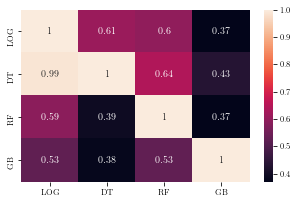

[1.0, 0.6133333333333333, 0.36666666666666664, 0.3019047619047619, 0.3780952380952381, 0.3942857142857143, 0.36996735582154516, 1.0, 1.0, 0.3721436343852013, 0.5913978494623656]


LOG LOG LOG LOG   LOG LOG LOG DT   LOG LOG RF DT   \
LOG LOG LOG LOG                1.0         0.613333        0.366667   
LOG LOG LOG DT                 1.0         0.613333        0.366667   
LOG LOG RF DT                  1.0         0.613333        0.366667   
LOG RF GB DT                   1.0         0.613333        0.366667   
DT GB DT DT                    1.0         0.613333        0.366667   
DT RF DT DT                    1.0         0.613333        0.366667   
RF RF GB GB                    1.0         0.613333        0.366667   
RF RF RF RF                    1.0         0.613333        0.366667   
GB GB GB GB                    1.0         0.613333        0.366667   
GB LOG LOG LOG                 1.0         0.613333        0.366667   
RF LOG LOG LOG                 1.0         0.613333        0.366667   

                  LOG RF GB DT   DT GB DT DT   DT RF DT DT   RF RF GB GB   \
LOG LOG LOG LOG        0.301905      0.378095      0.394286      0.369967   
LOG LOG LOG DT         0.301905      0.378095      0.394286      0.369967   
LOG LOG RF DT          0.301905      0.378095      0.394286      0.369967   
LOG RF GB DT           0.301905      0.378095      0.394286      0.369967   
DT GB DT DT            0.301905      0.378095      0.394286      0.369967   
DT RF DT DT            0.301905      0.378095      0.394286      0.369967   
RF RF GB GB            0.301905      0.378095      0.394286      0.369967   
RF RF RF RF            0.301905      0.378095      0.394286      0.369967   
GB GB GB GB            0.301905      0.378095      0.394286      0.369967   
GB LOG LOG LOG         0.301905      0.378095      0.394286      0.369967   
RF LOG LOG LOG         0.301905      0.378095      0.394286      0.369967   

                  RF RF RF RF   GB GB GB GB   GB LOG LOG LOG   RF LOG LOG LOG   
LOG LOG LOG LOG            1.0           1.0         0.372144         0.591398  
LOG LOG LOG DT             1.0           1.0         0.372144         0.591398  
LOG LOG RF DT              1.0           1.0         0.372144         0.591398  
LOG RF GB DT               1.0           1.0         0.372144         0.591398  
DT GB DT DT                1.0           1.0         0.372144         0.591398  
DT RF DT DT                1.0           1.0         0.372144         0.591398  
RF RF GB GB                1.0           1.0         0.372144         0.591398  
RF RF RF RF                1.0           1.0         0.372144         0.591398  
GB GB GB GB                1.0           1.0         0.372144         0.591398  
GB LOG LOG LOG             1.0           1.0         0.372144         0.591398  
RF LOG LOG LOG             1.0           1.0         0.372144         0.591398

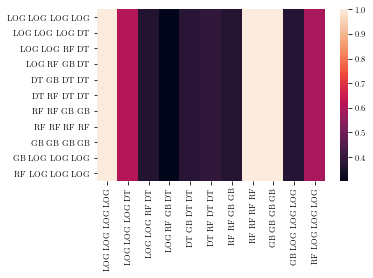

In [18]:
visualize.visualize_heatmap_of_combinations(Summary)

 45%|████▌     | 226/500 [00:00<00:00, 2254.56it/s]

250


100%|██████████| 500/500 [00:00<00:00, 2214.65it/s]


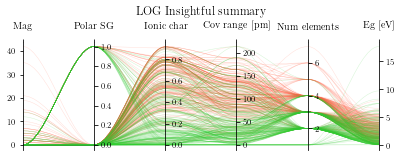

 40%|███▉      | 199/500 [00:00<00:00, 1988.87it/s]

250


100%|██████████| 500/500 [00:00<00:00, 2070.51it/s]


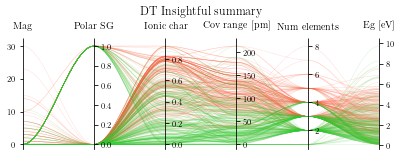

 44%|████▍     | 220/500 [00:00<00:00, 2191.87it/s]

250


100%|██████████| 500/500 [00:00<00:00, 2155.82it/s]


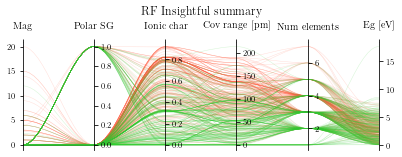

 41%|████▏     | 207/500 [00:00<00:00, 2068.05it/s]

250


100%|██████████| 500/500 [00:00<00:00, 2117.13it/s]


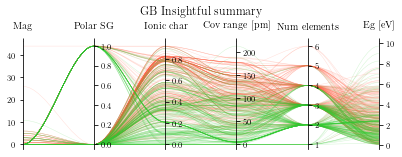

In [19]:
abbreviations = ["LOG ", "DT ", "RF ", "GB "]
for i in range(len(abbreviations)):
    generatedData["candidate"] = Summary[abbreviations[i]]
    visualize.make_parallel_coordinate_matplot(generatedData[Summary[abbreviations[i]]!=-1], InsertApproach+str(abbreviations[i]), title=str(abbreviations[i]) + "" + title, applyLegend=False)

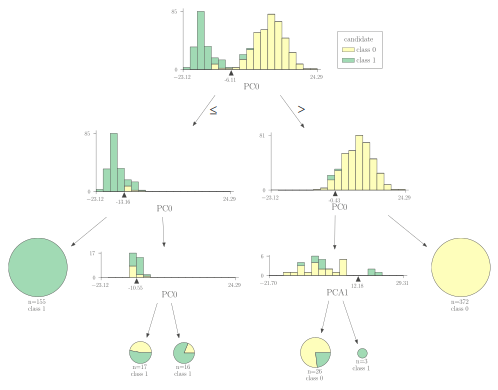

LogisticRegression(C=0.46415888336127775, max_iter=200, random_state=1)


DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=1)


RandomForestClassifier(max_depth=7, random_state=1)


GradientBoostingClassifier(max_depth=5, max_features='auto', random_state=1)


In [39]:
if (InsertApproach == "03-insightful-approach") & (numberOfPrincipalComponents==3):
    abbreviations = ["LOG ", "DT ", "RF ", "GB "]
    visualize.plot_2D3Dcontours(trainingSet, trainingSet[["candidate"]].values.reshape(-1,), Summary, abbreviations, InsertApproach, 3)

In [21]:
visualize.plot_histogram_bg_proba(Summary)

100%|██████████| 500/500 [00:00<00:00, 1271.17it/s]


/home/oliver/Dokumenter/masterprosjekt/predicting-solid-state-qubit-candidates/reports/figures/parallel_coordinates/summary-03-insightful-approach.pgf


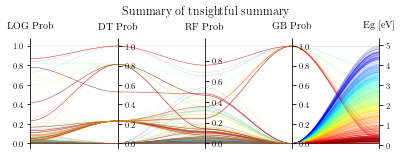

In [22]:
visualize.make_parallel_coordinate_matplot_summary(Summary, 
                                               InsertApproach, 
                                               title=str("Summary of t" + title[1:]), 
                                               applyLegend=False)

## Comparing the approaches

In [23]:
Summary_01 = pd.read_pickle(models_dir / "01-ferrenti-approach" /  "summary" / Path("PCA-" + str(176) + "-" + "summary.pkl"))
Summary_02 = pd.read_pickle(models_dir / "02-augmented-ferrenti-approach" / "summary" / Path("PCA-" + str(176) + "-" + "summary.pkl"))
Summary_03 = pd.read_pickle(models_dir / "03-insightful-approach" / "summary" / Path("PCA-" + str(176) + "-" + "summary.pkl"))

In [24]:
list_mpid_03 = RF_DT_GB_LOG.material_id

In [25]:
list_mpid_02 = Summary_02[(Summary_02["RF "] == 1) & 
                          (Summary_02["DT "] == 1) & 
                          (Summary_02["GB "] == 1) & 
                          (Summary_02["LOG "] == 1)].material_id.values

list_mpid_01 = Summary_01[(Summary_01["RF "] == 1) & 
                          (Summary_01["DT "] == 1) & 
                          (Summary_01["GB "] == 1) & 
                          (Summary_01["LOG "] == 1)].material_id.values

list_mpid_00 = Summary_03[(Summary_03["RF "] == 1) & 
                          (Summary_03["DT "] == 1) & 
                          (Summary_03["GB "] == 1) & 
                          (Summary_03["LOG "] == 1)].material_id.values


In [26]:
print(list_mpid_00.shape, list_mpid_01.shape, list_mpid_02.shape, list_mpid_03.shape)

(214,) (6804,) (9227,) (317,)


In [27]:
overlapping_entries2 = list_mpid_03[list_mpid_03.isin(list_mpid_02)]
overlapping_entries1 = list_mpid_03[list_mpid_03.isin(list_mpid_01)]
overlapping_entries0 = list_mpid_03[list_mpid_03.isin(list_mpid_00)]

In [28]:
list_mpid_03

1              mp-7
2             mp-14
3             mp-19
8            mp-111
10           mp-137
            ...    
22939    mp-1199624
24113    mp-1203927
24147    mp-1204057
24186    mp-1204230
24253    mp-1204533
Name: material_id, Length: 317, dtype: object

In [29]:
print(Summary[Summary["material_id"].isin(overlapping_entries1)].shape)
print(Summary[Summary["material_id"].isin(overlapping_entries2)].shape)
print(Summary[Summary["material_id"].isin(overlapping_entries0)].shape)

(112, 12)
(168, 12)
(204, 12)


In [30]:
Summary[(Summary["material_id"].isin(overlapping_entries1)) & Summary["material_id"].isin(overlapping_entries2)]

material_id full_formula pretty_formula  LOG   LOG Prob  DT   DT Prob  \
13         mp-157           P4              P   1.0  0.951119  1.0   1.0000   
16         mp-189       Si4Ru4           SiRu   1.0  0.955451  1.0   1.0000   
45         mp-344         B4N4             BN   1.0  0.769568  1.0   0.8125   
119        mp-820       Hg1Se1           HgSe   1.0  0.978254  1.0   1.0000   
127        mp-871       Fe4Si4           FeSi   1.0  0.975248  1.0   1.0000   
...           ...          ...            ...   ...       ...  ...      ...   
19360  mp-1079228    Ga4Bi1As3       Ga4BiAs3   1.0  0.856113  1.0   1.0000   
19362  mp-1079248      K3Na1H4         K3NaH4   1.0  0.908845  1.0   1.0000   
19492  mp-1084771        Be6P4          Be3P2   1.0  0.756137  1.0   0.8125   
19515  mp-1093989          Na1             Na   1.0  0.998884  1.0   1.0000   
19785  mp-1104073        C11N4          C11N4   1.0  0.925123  1.0   0.8125   

       RF    RF Prob  GB    GB Prob   MP BG  
13     1.0  0.946339  1.0  0.999971  0.1151  
16     1.0  0.826492  1.0  0.999971  0.2541  
45     1.0  0.882403  1.0  0.999963  3.5021  
119    1.0  0.695839  1.0  0.999971  0.1236  
127    1.0  0.922298  1.0  0.999971  0.1664  
...    ...       ...  ...       ...     ...  
19360  1.0  0.860486  1.0  0.999971  0.3951  
19362  1.0  0.659631  1.0  0.999971  2.6032  
19492  1.0  0.534138  1.0  0.999968  0.2102  
19515  1.0  0.655000  1.0  0.999971  1.3527  
19785  1.0  0.523818  1.0  0.999979  2.8141  

[75 rows x 12 columns]

In [31]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10000):

    display(Summary[Summary["material_id"].isin(overlapping_entries2)])

material_id     full_formula pretty_formula  LOG   LOG Prob  DT   \
2           mp-14              Se3             Se   1.0  0.958519  1.0   
3           mp-19              Te3             Te   1.0  0.959562  1.0   
10         mp-137             Ge12             Ge   1.0  0.969617  1.0   
13         mp-157               P4              P   1.0  0.951119  1.0   
16         mp-189           Si4Ru4           SiRu   1.0  0.955451  1.0   
...           ...              ...            ...   ...       ...  ...   
19785  mp-1104073            C11N4          C11N4   1.0  0.925123  1.0   
22497  mp-1198022             Ge34             Ge   1.0  0.961009  1.0   
22939  mp-1199624  Ba16Na8Nb40O120    Ba2NaNb5O15   1.0  0.964328  1.0   
24113  mp-1203927         Mo8N4O30       Mo4N2O15   1.0  0.969465  1.0   
24186  mp-1204230     Sr64Ga32O112       Sr4Ga2O7   1.0  0.946602  1.0   

       DT Prob  RF    RF Prob  GB    GB Prob   MP BG  
2       1.0000  1.0  0.899191  1.0  0.999971  1.0119  
3       1.0000  1.0  0.872486  1.0  0.999971  0.5752  
10      1.0000  1.0  0.822145  1.0  0.999971  0.8732  
13      1.0000  1.0  0.946339  1.0  0.999971  0.1151  
16      1.0000  1.0  0.826492  1.0  0.999971  0.2541  
...        ...  ...       ...  ...       ...     ...  
19785   0.8125  1.0  0.523818  1.0  0.999979  2.8141  
22497   1.0000  1.0  0.960481  1.0  0.999971  0.6701  
22939   1.0000  1.0  0.874444  1.0  0.999971  2.5069  
24113   1.0000  1.0  0.903409  1.0  0.999971  0.1373  
24186   1.0000  1.0  0.820570  1.0  0.999971  2.9805  

[168 rows x 12 columns]

In [32]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10000):

    display(Summary[Summary["material_id"].isin(overlapping_entries0)])

material_id full_formula pretty_formula  LOG   LOG Prob  DT   DT Prob  \
1            mp-7           S6              S   1.0  0.832759  1.0   0.8125   
2           mp-14          Se3             Se   1.0  0.958519  1.0   1.0000   
3           mp-19          Te3             Te   1.0  0.959562  1.0   1.0000   
8          mp-111          Ne1             Ne   1.0  0.960822  1.0   1.0000   
10         mp-137         Ge12             Ge   1.0  0.969617  1.0   1.0000   
...           ...          ...            ...   ...       ...  ...      ...   
22031  mp-1196461      C156F84          C13F7   1.0  0.936335  1.0   0.8125   
22067  mp-1196569  Mg17Si20O60   Mg17(SiO3)20   1.0  0.995918  1.0   1.0000   
22497  mp-1198022         Ge34             Ge   1.0  0.961009  1.0   1.0000   
24113  mp-1203927     Mo8N4O30       Mo4N2O15   1.0  0.969465  1.0   1.0000   
24147  mp-1204057     Si72O144           SiO2   1.0  0.987298  1.0   1.0000   

       RF    RF Prob  GB    GB Prob    MP BG  
1      1.0  0.684229  1.0  0.999968   2.4881  
2      1.0  0.899191  1.0  0.999971   1.0119  
3      1.0  0.872486  1.0  0.999971   0.5752  
8      1.0  0.857321  1.0  0.999971  11.8025  
10     1.0  0.822145  1.0  0.999971   0.8732  
...    ...       ...  ...       ...      ...  
22031  1.0  0.997647  1.0  0.999968   1.1244  
22067  1.0  0.912143  1.0  0.999971   0.1226  
22497  1.0  0.960481  1.0  0.999971   0.6701  
24113  1.0  0.903409  1.0  0.999971   0.1373  
24147  1.0  0.883867  1.0  0.999971   5.6518  

[204 rows x 12 columns]